# Week 3 Assessment: Orthogonal Projections

## Learning Objectives

In this week, we will write functions which perform orthogonal projections.

By the end of this week, you should be able to

1. Write code that projects data onto lower-dimensional subspaces.
2. Understand the real world applications of projections.

We highlight some tips and tricks which would be useful when you implement numerical 
algorithms that you have never encountered before. 
You are invited to think about these concepts when you 
write your program. 

The important thing is to learn to map from mathematical equations to code. It is not always
easy to do so, but you will get better at it with more practice.

We will apply this to project high-dimensional face images onto lower dimensional basis which we call "eigenfaces". We will also revisit the problem of linear regression, but from the perspective of solving normal equations,
the concept which you apply to derive the formula for orthogonal projections. We will apply this to predict housing 
prices for the Boston housing dataset, which is a classic example in machine learning.

In [1]:
# PACKAGE: DO NOT EDIT
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces()
faces = dataset.data

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /home/jovyan/scikit_learn_data


### Advice for testing numerical algorithms

Testing machine learning algorithms (or numerical algorithms in general)
is sometimes really hard as it depends on the dataset
to produce an answer, and you will never be able to test your algorithm on all the datasets
we have in the world. Nevertheless, we have some tips for you to help you identify bugs in
your implementations.

#### 1. Test on small dataset
Test your algorithms on small dataset: datasets of size 1 or 2 sometimes will suffice. This
is useful because you can (if necessary) compute the answers by hand and compare them with
the answers produced by the computer program you wrote. In fact, these small datasets can even have special numbers,
which will allow you to compute the answers by hand easily.

#### 2. Find invariants
Invariants refer to properties of your algorithm and functions that are maintained regardless
of the input. We will highlight this point later in this notebook where you will see functions,
which will check invariants for some of the answers you produce.

Invariants you may want to look for:
1. Does your algorithm always produce a positive/negative answer, or a positive definite matrix?
2. If the algorithm is iterative, do the intermediate results increase/decrease monotonically?
3. Does your solution relate with your input in some interesting way, e.g. orthogonality? 

When you have a set of invariants, you can generate random inputs and make 
assertions about these invariants. This is sometimes known as [fuzzing](https://en.wikipedia.org/wiki/Fuzzing), which has proven to be a very effective technique for identifying bugs in programs.

Finding invariants is hard, and sometimes there simply isn't any invariant. However, DO take advantage of them if you can find them. They are the most powerful checks when you have them.

## 1. Orthogonal Projections

Recall that for projection of a vector $x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert \boldsymbol b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = (\boldsymbol b_1|...|\boldsymbol b_M)$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

Note that for orthogonal projections, we have the following invariants:

In [3]:
import numpy.testing as np_test
def test_property_projection_matrix(P):
    """Test if the projection matrix satisfies certain properties.
    In particular, we should have P @ P = P, and P = P^T
    """
    np_test.assert_almost_equal(P, P @ P)
    np_test.assert_almost_equal(P, P.T)

def test_property_projection(x, p):
    """Test orthogonality of x and its projection p."""
    np_test.assert_almost_equal(np.dot(p-x, p), 0)

In [9]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
# Projection 1d

# ===YOU SHOULD EDIT THIS FUNCTION===
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    D, = b.shape
    P = np.outer(b, b) / np.linalg.norm(b) ** 2 # EDIT THIS
    return P

# ===YOU SHOULD EDIT THIS FUNCTION===
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: projection of x in space spanned by b
    """
    p = projection_matrix_1d(b) @ x # EDIT THIS
    return p

# Projection onto general subspace
# ===YOU SHOULD EDIT THIS FUNCTION===
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = B @ np.linalg.inv(B.T @ B) @ B.T # EDIT THIS
    return P

# ===YOU SHOULD EDIT THIS FUNCTION===
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, E), the basis for the subspace
    
    Returns:
        y: projection of x in space spanned by b
    """
    p = projection_matrix_general(B) @ x # EDIT THIS
    return p

We have included some unittest for you to test your implementation.

In [5]:
# Orthogonal projection in 2d
# define basis vector for subspace
b = np.array([2,1]).reshape(-1,1)
# point to be projected later
x = np.array([1,2]).reshape(-1, 1)

In [10]:
# Test 1D
np_test.assert_almost_equal(projection_matrix_1d(np.array([1, 2, 2])), 
                            np.array([[1,  2,  2],
                                      [2,  4,  4],
                                      [2,  4,  4]]) / 9)

np_test.assert_almost_equal(project_1d(np.ones(3),
                                       np.array([1, 2, 2])),
                            np.array([5, 10, 10]) / 9)

B = np.array([[1, 0],
              [1, 1],
              [1, 2]])

# Test General
np_test.assert_almost_equal(projection_matrix_general(B), 
                            np.array([[5,  2, -1],
                                      [2,  2,  2],
                                      [-1, 2,  5]]) / 6)

np_test.assert_almost_equal(project_general(np.array([6, 0, 0]), B), 
                            np.array([5, 2, -1]))
print('correct')

correct


In [11]:
# Write your own test cases here, use random inputs, utilize the invariants we have!

## 2. Eigenfaces  (optional)

Next, we will take a look at what happens if we project some dataset consisting of human faces onto some basis we call
the "eigenfaces".

In [12]:
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces()
faces = dataset.data

In [13]:
mean = faces.mean(axis=0)
std = faces.std(axis=0)
faces_normalized = (faces - mean) / std

The data for the basis has been saved in a file named `eigenfaces.py`, first we load it into the variable B.

In [14]:
B = np.load('eigenfaces.npy')[:50] # we use the first 50 dimensions of the basis, you should play around with the dimension here.
print("the eigenfaces have shape {}".format(B.shape))

the eigenfaces have shape (50, 64, 64)


Along the first dimension of B, each instance is a `64x64` image, an "eigenface". Let's visualize 
a few of them.

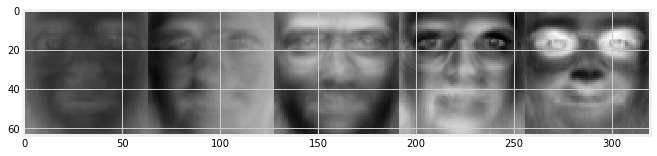

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack(B[:5]), cmap='gray');

Take a look at what happens if we project our faces onto the basis spanned by these "eigenfaces". This requires
us to reshape B into the same shape as the matrix representing the basis as we have done earlier. Then we can 
reuse the functions we implemented earlier to compute the projection matrix and the projection. Complete the code below to visualize the reconstructed faces that lie on the subspace spanned by the "eigenfaces".

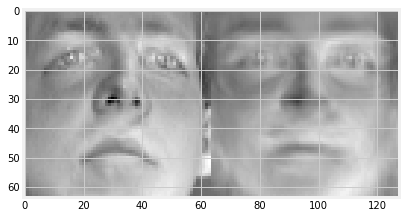

In [22]:
@interact(i=(0, 10))
def show_eigenface_reconstruction(i):
    original_face = faces_normalized[i].reshape(64, 64)
    # project original_face onto the vector space spanned by B_basis,
    # you should take advantage of the functions you have implemented above
    # to perform the projection. First, reshape B such that it represents the basis
    # for the eigenfaces. Then perform orthogonal projection which would give you
    # `face_reconstruction`.
    B_basis = B.reshape(B.shape[0], -1).T
    face_reconstruction = project_general(original_face.flatten(), B_basis)
    face_reconstruction = face_reconstruction.reshape([64, 64])
    plt.figure()
    plt.imshow(np.hstack([original_face, face_reconstruction]), cmap='gray')
    plt.show()

__Question__:

What would happen to the reconstruction as we increase the dimension of our basis? 

Modify the code above to visualize it.

## 3. Least square for predicting Boston housing prices (optional)

Consider the case where we have a linear model for predicting housing prices. We are predicting the housing prices based on features in the 
housing dataset. If we collect the features in a vector $\boldsymbol{x}$, and the price of the houses as $y$. Assuming that we have 
a prediction model in the way such that $\hat{y}_i =  f(\boldsymbol {x}_i) = \boldsymbol \theta^T\boldsymbol{x}_i$.

If we collect the dataset of $n$ datapoints $\boldsymbol x_i$ in a data matrix $\boldsymbol X$, we can write down our model like this:

$$
\begin{bmatrix} 
\boldsymbol {x}_1^T \\
\vdots \\ 
\boldsymbol {x}_n^T 
\end{bmatrix} \boldsymbol {\theta} = \begin{bmatrix} 
y_1 \\
\vdots \\ 
y_n 
\end{bmatrix}.
$$

That is,

$$
\boldsymbol X\boldsymbol{\theta} = \boldsymbol {y}.
$$
where $\boldsymbol y$ collects all house prices $y_1,\dotsc, y_n$ of the training set.

Our goal is to find the best $\boldsymbol \theta$ that minimizes the following (least squares) objective:

$$
\begin{eqnarray} 
&\sum^n_{i=1}{\lVert \boldsymbol \theta^T\boldsymbol {x}_i - y_i \rVert^2} \\
&= (\boldsymbol X\boldsymbol {\theta} - \boldsymbol y)^T(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y).
\end{eqnarray}
$$
Note that we aim to minimize the squared error between the prediction $\boldsymbol \theta^T\boldsymbol {x}_i$  of the model and the observed data point $y_i$ in the training set. 

To find the optimal (maximum likelihood) parameters $\boldsymbol \theta^*$, we set the gradient of the least-squares objective to $\boldsymbol 0$:
$$
\begin{eqnarray} 
\nabla_{\boldsymbol\theta}(\boldsymbol X{\boldsymbol \theta} - \boldsymbol y)^T(\boldsymbol X{\boldsymbol \theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\iff \nabla_{\boldsymbol\theta}(\boldsymbol {\theta}^T\boldsymbol X^T - \boldsymbol y^T)(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\iff \nabla_{\boldsymbol\theta}(\boldsymbol {\theta}^T\boldsymbol X^T\boldsymbol X\boldsymbol {\theta} - \boldsymbol y^T\boldsymbol X\boldsymbol \theta - \boldsymbol \theta^T\boldsymbol X^T\boldsymbol y + \boldsymbol y^T\boldsymbol y ) &=& \boldsymbol 0 \\
\iff 2\boldsymbol X^T\boldsymbol X\boldsymbol \theta - 2\boldsymbol X^T\boldsymbol y &=& \boldsymbol 0 \\
\iff \boldsymbol X^T\boldsymbol X\boldsymbol \theta        &=& \boldsymbol X^T\boldsymbol y.
\end{eqnarray}
$$

The solution,\boldsymbol  which gives zero gradient solves the __normal equation__

$$\boldsymbol X^T\boldsymbol X\boldsymbol \theta = \boldsymbol X^T\boldsymbol y.$$

If you recall from the lecture on projection onto n-dimensional subspace, this is exactly the same as the normal equation we have for projection (take a look at the notes [here](https://www.coursera.org/teach/mathematics-machine-learning-pca/content/edit/supplement/fQq8T/content) if you don't remember them).

This means our optimal parameter vector, which minimizes our objective, is given by
$$\boldsymbol \theta^* = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y.$$ 

Let's put things into perspective and try to find the best parameter $\theta^*$ 
of the line $y = \theta x$, where $x,\theta\in\mathbb{R}$ for a given a training set $\boldsymbol X\in\mathbb{R}^n$ and $\boldsymbol y\in\mathbb{R}^n$.

Note that in our example, the features $x_i$ are only scalar, such that the parameter $\theta$ is also only a scalar. The derivation above holds for general parameter vectors (not only for scalars).

Note: This is exactly the same problem as linear regression which was discussed in [Mathematics for Machine Learning: Multivariate Calculus](https://www.coursera.org/teach/multivariate-calculus-machine-learning/content/edit/lecture/74ryq/video-subtitles). However, rather than finding the optimimal $\theta^*$ with gradient descent, we can solve this using the normal equation.

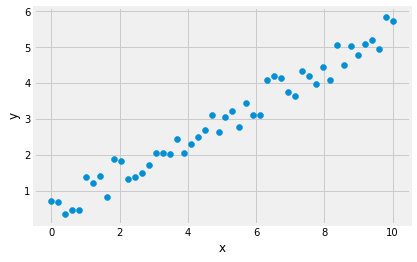

In [23]:
x = np.linspace(0, 10, num=50)

random = np.random.RandomState(42)  # we use the same random seed so we get deterministic output
theta = random.randn()              # we use a random theta, our goal is to perform linear regression which finds theta_hat that minimizes the objective
y = theta * x + random.rand(len(x)) # our theta is corrupted by some noise, so that we do not get (x,y) on a line

plt.scatter(x, y);
plt.xlabel('x');
plt.ylabel('y');

In [24]:
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

theta_hat = np.linalg.solve(X.T @ X, 
                            X.T @ Y)

We can show how our $\hat{\theta}$ fits the line.

theta = 0.496714
theta_hat = 0.570541


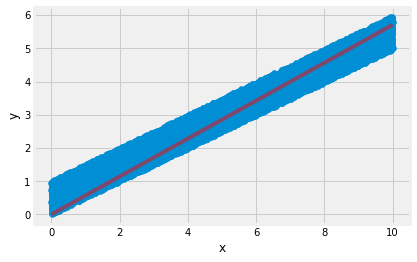

In [31]:
fig, ax = plt.subplots()
ax.scatter(x, y);
xx = [0, 10]
yy = [0, 10 * theta_hat[0,0]]
ax.plot(xx, yy, 'red', alpha=.5);
ax.set(xlabel='x', ylabel='y');
print("theta = %f" % theta)
print("theta_hat = %f" % theta_hat)

What would happen to $\lVert {\theta^*} - \theta \rVert$ if we increased the number of datapoints?

Make your hypothesis, and write a small program to confirm it!

In [33]:
N = np.arange(10, 10000, step=10)
# Your code here which calculates θ* for different sample size.
print("theta = %f" % theta)

for n in N:
    x = np.linspace(0, 10, num=n)

    random = np.random.RandomState(42)  # we use the same random seed so we get deterministic output
    y = theta * x + random.rand(len(x)) # our theta is corrupted by some noise, so that we do not get (x,y) on a line
    
    X = x.reshape(-1,1)
    Y = y.reshape(-1,1)

    theta_hat = np.linalg.solve(X.T @ X, X.T @ Y)
    print("n = %f" % n)
    print("theta_hat = %f" % theta_hat)
    

theta = 0.496714
n = 10.000000
theta_hat = 0.570003
n = 20.000000
theta_hat = 0.557657
n = 30.000000
theta_hat = 0.556657
n = 40.000000
theta_hat = 0.563666
n = 50.000000
theta_hat = 0.561396
n = 60.000000
theta_hat = 0.567205
n = 70.000000
theta_hat = 0.567138
n = 80.000000
theta_hat = 0.566457
n = 90.000000
theta_hat = 0.568318
n = 100.000000
theta_hat = 0.567407
n = 110.000000
theta_hat = 0.565818
n = 120.000000
theta_hat = 0.569449
n = 130.000000
theta_hat = 0.569690
n = 140.000000
theta_hat = 0.569854
n = 150.000000
theta_hat = 0.567666
n = 160.000000
theta_hat = 0.568893
n = 170.000000
theta_hat = 0.567869
n = 180.000000
theta_hat = 0.567316
n = 190.000000
theta_hat = 0.568248
n = 200.000000
theta_hat = 0.570798
n = 210.000000
theta_hat = 0.568532
n = 220.000000
theta_hat = 0.569664
n = 230.000000
theta_hat = 0.569956
n = 240.000000
theta_hat = 0.569355
n = 250.000000
theta_hat = 0.572281
n = 260.000000
theta_hat = 0.572091
n = 270.000000
theta_hat = 0.573069
n = 280.000000
theta

n = 3270.000000
theta_hat = 0.571323
n = 3280.000000
theta_hat = 0.571383
n = 3290.000000
theta_hat = 0.571404
n = 3300.000000
theta_hat = 0.571389
n = 3310.000000
theta_hat = 0.571315
n = 3320.000000
theta_hat = 0.571321
n = 3330.000000
theta_hat = 0.571380
n = 3340.000000
theta_hat = 0.571497
n = 3350.000000
theta_hat = 0.571452
n = 3360.000000
theta_hat = 0.571442
n = 3370.000000
theta_hat = 0.571451
n = 3380.000000
theta_hat = 0.571459
n = 3390.000000
theta_hat = 0.571329
n = 3400.000000
theta_hat = 0.571492
n = 3410.000000
theta_hat = 0.571509
n = 3420.000000
theta_hat = 0.571378
n = 3430.000000
theta_hat = 0.571492
n = 3440.000000
theta_hat = 0.571628
n = 3450.000000
theta_hat = 0.571704
n = 3460.000000
theta_hat = 0.571776
n = 3470.000000
theta_hat = 0.571748
n = 3480.000000
theta_hat = 0.571846
n = 3490.000000
theta_hat = 0.571756
n = 3500.000000
theta_hat = 0.571842
n = 3510.000000
theta_hat = 0.571925
n = 3520.000000
theta_hat = 0.571902
n = 3530.000000
theta_hat = 0.571860
n

n = 6320.000000
theta_hat = 0.571114
n = 6330.000000
theta_hat = 0.571077
n = 6340.000000
theta_hat = 0.571027
n = 6350.000000
theta_hat = 0.571049
n = 6360.000000
theta_hat = 0.571081
n = 6370.000000
theta_hat = 0.571042
n = 6380.000000
theta_hat = 0.571116
n = 6390.000000
theta_hat = 0.571101
n = 6400.000000
theta_hat = 0.571119
n = 6410.000000
theta_hat = 0.571153
n = 6420.000000
theta_hat = 0.571147
n = 6430.000000
theta_hat = 0.571146
n = 6440.000000
theta_hat = 0.571182
n = 6450.000000
theta_hat = 0.571148
n = 6460.000000
theta_hat = 0.571155
n = 6470.000000
theta_hat = 0.571172
n = 6480.000000
theta_hat = 0.571221
n = 6490.000000
theta_hat = 0.571217
n = 6500.000000
theta_hat = 0.571173
n = 6510.000000
theta_hat = 0.571170
n = 6520.000000
theta_hat = 0.571214
n = 6530.000000
theta_hat = 0.571195
n = 6540.000000
theta_hat = 0.571212
n = 6550.000000
theta_hat = 0.571189
n = 6560.000000
theta_hat = 0.571193
n = 6570.000000
theta_hat = 0.571144
n = 6580.000000
theta_hat = 0.571121
n

n = 8810.000000
theta_hat = 0.570379
n = 8820.000000
theta_hat = 0.570383
n = 8830.000000
theta_hat = 0.570355
n = 8840.000000
theta_hat = 0.570359
n = 8850.000000
theta_hat = 0.570374
n = 8860.000000
theta_hat = 0.570350
n = 8870.000000
theta_hat = 0.570370
n = 8880.000000
theta_hat = 0.570331
n = 8890.000000
theta_hat = 0.570325
n = 8900.000000
theta_hat = 0.570316
n = 8910.000000
theta_hat = 0.570382
n = 8920.000000
theta_hat = 0.570402
n = 8930.000000
theta_hat = 0.570392
n = 8940.000000
theta_hat = 0.570375
n = 8950.000000
theta_hat = 0.570423
n = 8960.000000
theta_hat = 0.570436
n = 8970.000000
theta_hat = 0.570420
n = 8980.000000
theta_hat = 0.570392
n = 8990.000000
theta_hat = 0.570429
n = 9000.000000
theta_hat = 0.570407
n = 9010.000000
theta_hat = 0.570428
n = 9020.000000
theta_hat = 0.570355
n = 9030.000000
theta_hat = 0.570356
n = 9040.000000
theta_hat = 0.570370
n = 9050.000000
theta_hat = 0.570361
n = 9060.000000
theta_hat = 0.570355
n = 9070.000000
theta_hat = 0.570353
n

We see how we can find the best $\theta$. In fact, we can extend our methodology to higher dimensional dataset. Let's now try applying the same methodology to the boston housing prices dataset.

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_X, boston_y = boston.data, boston.target
print("The housing dataset has size {}".format(boston_X.shape))
print("The prices has size {}".format(boston_X.shape))

boston_theta_hat = np.linalg.solve(boston_X.T @ boston_X, boston_X.T @ boston_y) ## EDIT THIS to predict boston_theta_hat
print("boston_theta_hat {}".format(boston_theta_hat))

The housing dataset has size (506, 13)
The prices has size (506, 13)
boston_theta_hat [ -9.16297843e-02   4.86751203e-02  -3.77930006e-03   2.85636751e+00
  -2.88077933e+00   5.92521432e+00  -7.22447929e-03  -9.67995240e-01
   1.70443393e-01  -9.38925373e-03  -3.92425680e-01   1.49832102e-02
  -4.16972624e-01]
